In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [27]:
df = pd.read_csv("mall customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df = df.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'})
df['Gender'] = df['Gender'].replace(['Male', 'Female'],[1,0])
df.head()

C:\Users\MD Maruf\AppData\Local\Temp\ipykernel_14564\2086650241.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(['Male', 'Female'],[1,0])


,CustomerID,Gender,Age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


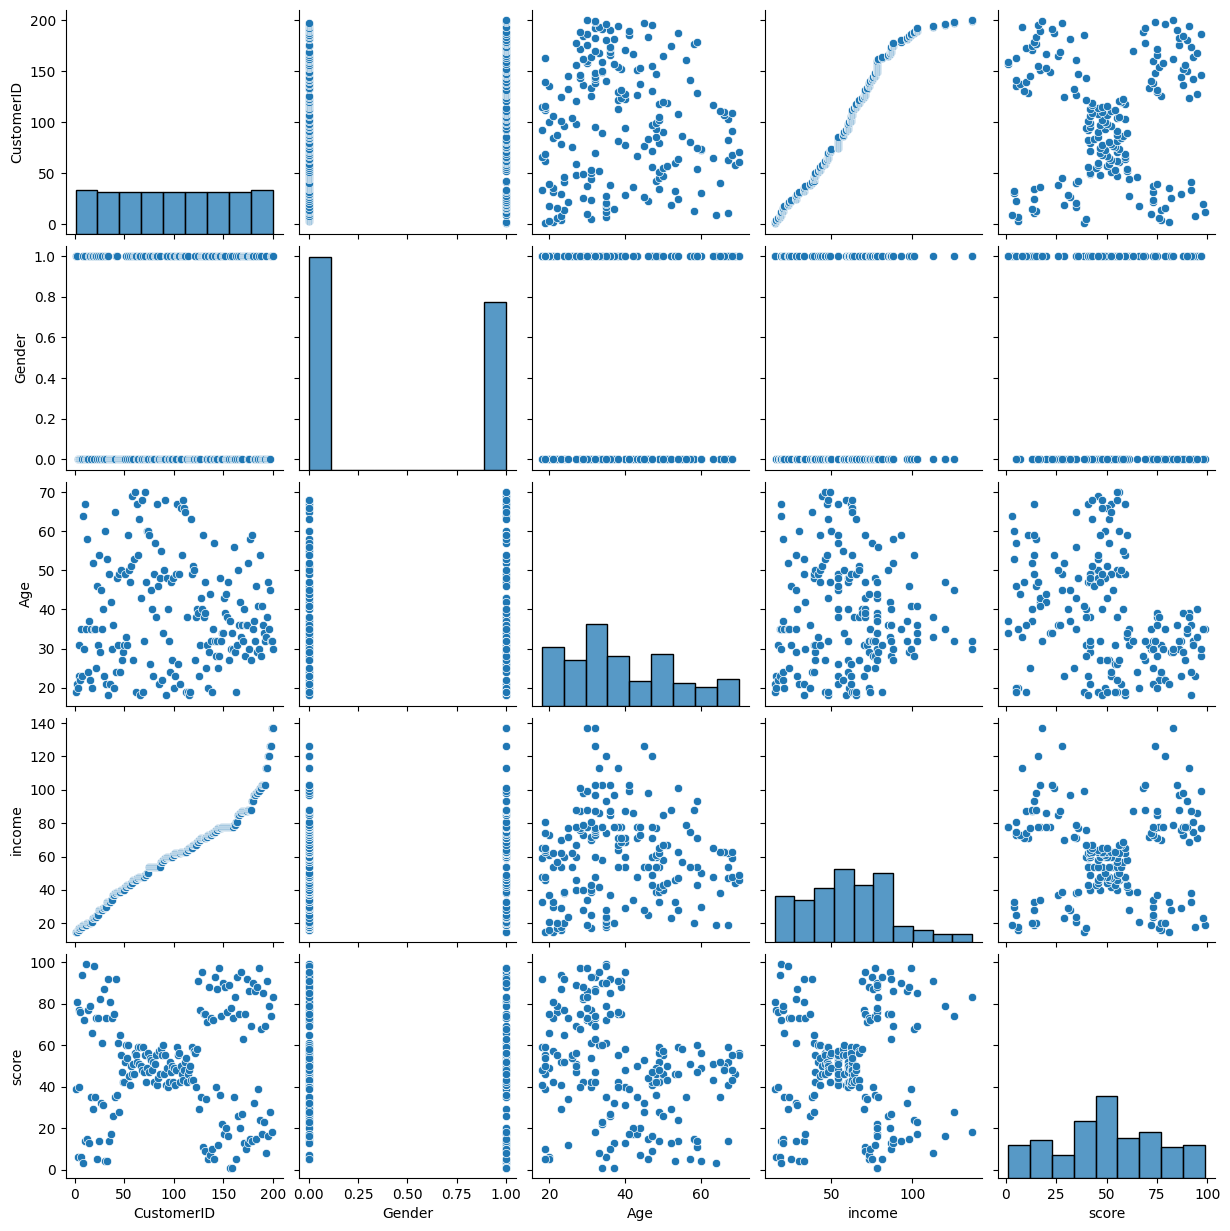

In [32]:
sns.pairplot(df)


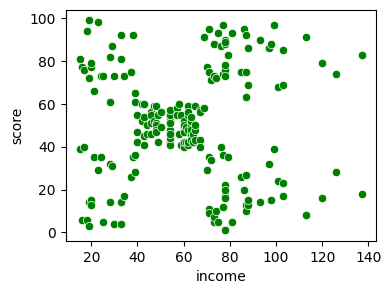

In [33]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='income', y='score', data=df, color='green')
plt.show()

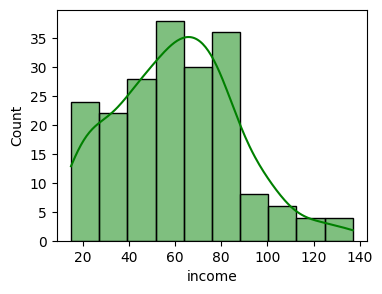

In [34]:
plt.figure(figsize=(4,3))
sns.histplot(x='income', data=df, color='green', kde=True)
plt.show()

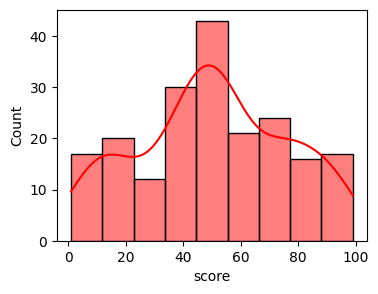

In [35]:
plt.figure(figsize=(4,3))
sns.histplot(x='score', data=df, color='red', kde=True)
plt.show()

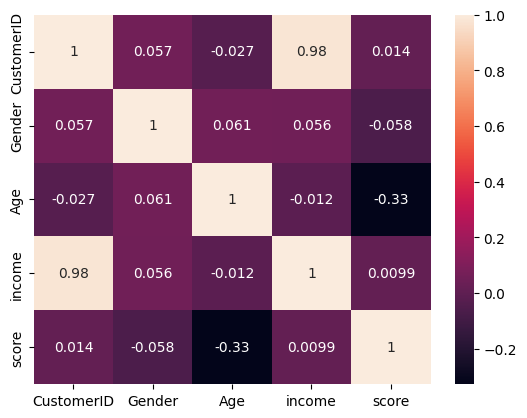

In [36]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [37]:
kmeans = KMeans()
model = kmeans.fit(df[['income', 'score']])

In [38]:
model

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [39]:
pred = model.predict(df[['income', 'score']])
pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 6, 0, 0, 6, 6, 0, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 1, 2, 6, 2, 1, 2, 1, 2,
       6, 2, 1, 2, 1, 2, 1, 2, 1, 2, 6, 2, 1, 2, 6, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5,
       7, 5], dtype=int32)

In [40]:
df['pred_plus'] = pred
df.head(7)

,CustomerID,Gender,Age,income,score,pred_plus
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3
5,6,0,22,17,76,4
6,7,0,35,18,6,3


In [41]:
cluster_1 = model.cluster_centers_
cluster_1

array([[ 45.51282051,  51.51282051],
       [ 79.70833333,  14.29166667],
       [ 78.03571429,  81.89285714],
       [ 25.14285714,  19.52380952],
       [ 24.95      ,  81.        ],
       [108.18181818,  82.72727273],
       [ 62.23404255,  47.55319149],
       [109.7       ,  22.        ]])

In [42]:
df0 = df[df['pred_plus'] == 0]
df1 = df[df['pred_plus'] == 1]
df2 = df[df['pred_plus'] == 2]
df3 = df[df['pred_plus'] == 3]
df4 = df[df['pred_plus'] == 4]
df5 = df[df['pred_plus'] == 5]
df6 = df[df['pred_plus'] == 6]
df7 = df[df['pred_plus'] == 7]

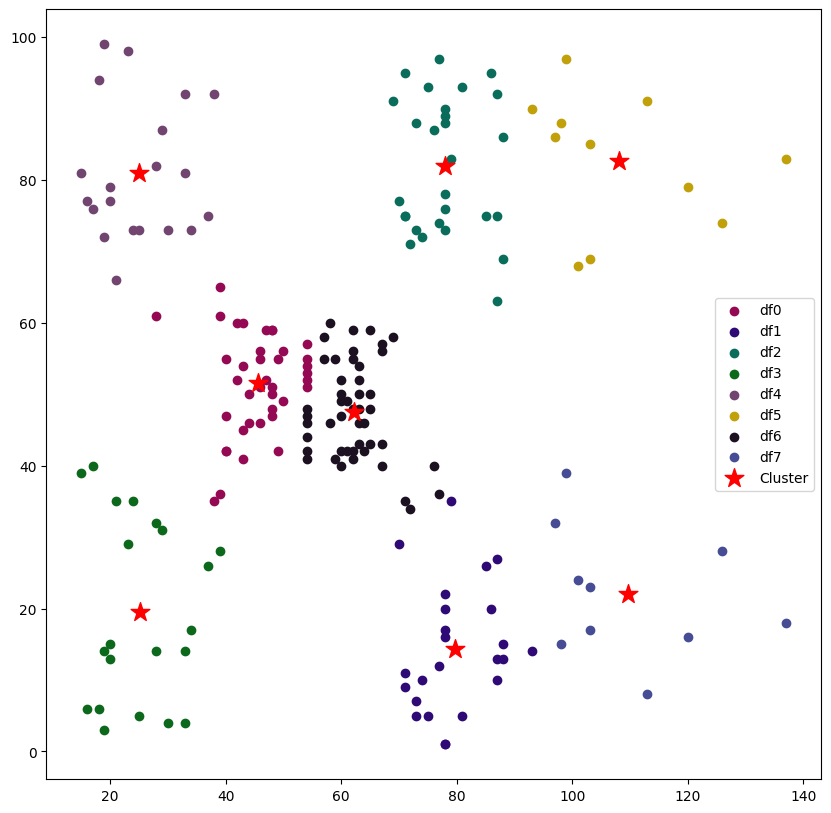

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(df0.income, df0.score, color='#950954', label='df0')
plt.scatter(df1.income, df1.score, color="#2F0975", label='df1')
plt.scatter(df2.income, df2.score, color="#0A6D5C", label='df2')
plt.scatter(df3.income, df3.score, color="#0C691B", label='df3')
plt.scatter(df4.income, df4.score, color="#724470", label='df4')
plt.scatter(df5.income, df5.score, color="#C2A00A", label='df5')
plt.scatter(df6.income, df6.score, color="#1C1120", label='df6')
plt.scatter(df7.income, df7.score, color="#464D94", label='df7')

plt.scatter(cluster_1[:,0], cluster_1[:,1], color='red', label='Cluster', marker='*', s=200)
plt.legend()
plt.show()

In [44]:
wcss = []
clus = range(2, 15)
for k in clus:
    kmean = KMeans(n_clusters=k)
    kmean.fit(df[['income', 'score']])
    wcss.append(kmean.inertia_)

In [45]:
wcss

[183653.32894736843,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 59349.99240542067,
 33859.371012691,
 26449.910028179373,
 22897.01091867235,
 25042.516502138213,
 18748.281274865483,
 16344.782975023909,
 15011.420905589595,
 14931.576732396272]

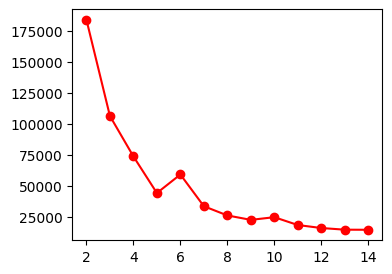

In [46]:
plt.figure(figsize=(4,3))
plt.plot(clus,wcss, color ="r", marker="o")

In [47]:
knl = KneeLocator(clus, wcss, curve="convex", direction="decreasing")

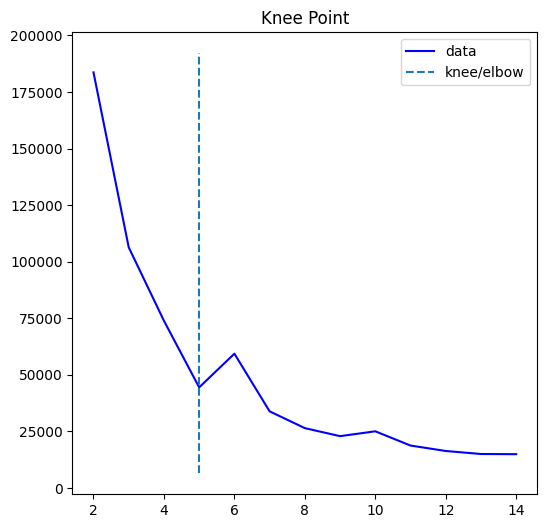

In [48]:
knl.plot_knee()

In [49]:
final_k = KMeans(n_clusters=5)
final_model = final_k.fit(df[['income', 'score']])
final_model

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [51]:
pred1 = final_model.predict(df[['income', 'score']])
pred1

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [55]:
df['pred_plus_f'] = pred1
df.tail(5)

,CustomerID,Gender,Age,income,score,pred_plus,pred_plus_f
195,196,0,35,120,79,5,2
196,197,0,45,126,28,7,1
197,198,1,32,126,74,5,2
198,199,1,32,137,18,7,1
199,200,1,30,137,83,5,2


In [56]:
center2 = final_model.cluster_centers_
center2

array([[55.0875    , 49.7125    ],
       [87.75      , 17.58333333],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [57]:
df['pred_plus_f'].value_counts()

pred_plus_f
0    80
2    39
1    36
3    23
4    22
Name: count, dtype: int64

In [60]:
df0 = df[df['pred_plus_f']==0]
df1 = df[df['pred_plus_f']==1]
df2 = df[df['pred_plus_f']==2]
df3 = df[df['pred_plus_f']==3]
df4 = df[df['pred_plus_f']==4]

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


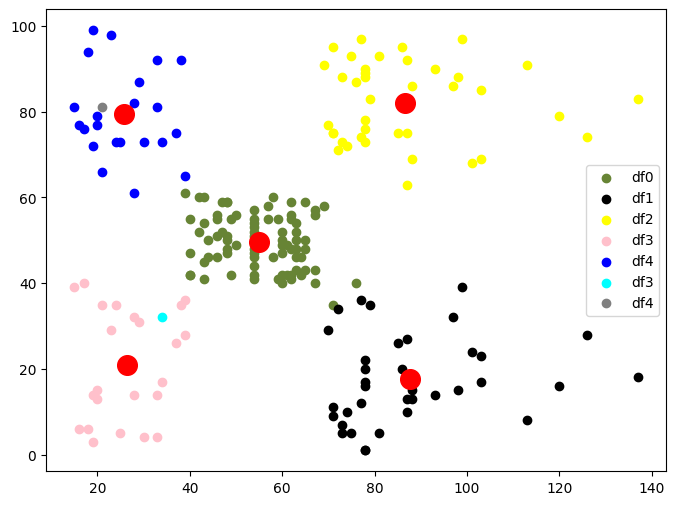

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(df0.income, df0.score, color='#678435', label='df0')
plt.scatter(df1.income, df1.score, color='black', label='df1')
plt.scatter(df2.income, df2.score, color='yellow', label='df2')
plt.scatter(df3.income, df3.score, color='pink', label='df3')
plt.scatter(df4.income, df4.score, color='blue', label='df4')
plt.scatter(34, 32, color='cyan', label=f'df{final_model.predict([[34, 32]])[0]}')
plt.scatter(21, 81, color='gray', label=f'df{final_model.predict([[21, 81]])[0]}')

plt.scatter(center2[:, 0], center2[:, 1], color='red', marker='o', s=200)
plt.legend()
plt.show()

In [73]:
final_model.predict([[34, 32], [21, 81]])

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3, 4], dtype=int32)